## Step 6: a1 Feature Analysis
##### Use modules built for a2 and a7
##### Really not expecting same strategy used for a2,a7,a4 to work for a1, but confirm

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
sys.path.append('../utils')
import DataAggregation as da
import AlgoUtils as au
cmap_bold = ListedColormap(['#00FF00','#FF0000'])

In [2]:
dd = da.GetFrames("../data/device_failure.csv", "a1", ldays=-300, lday_strict=False)

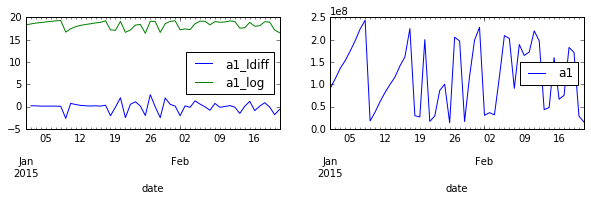

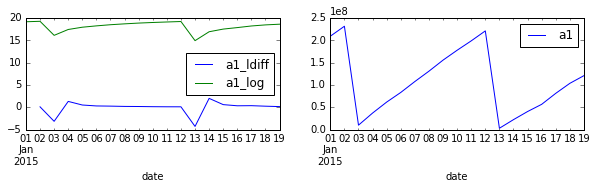

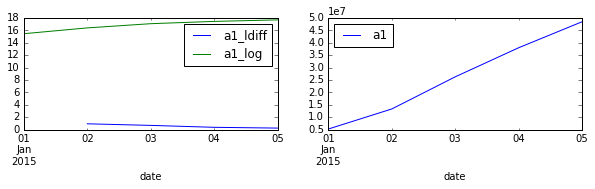

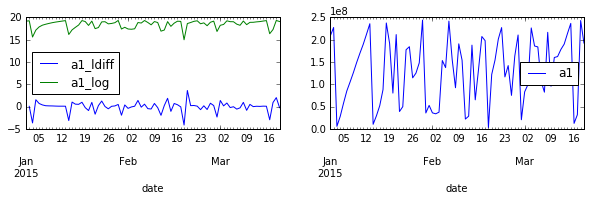

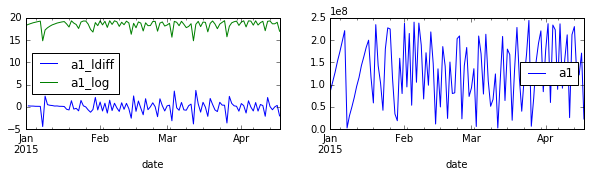

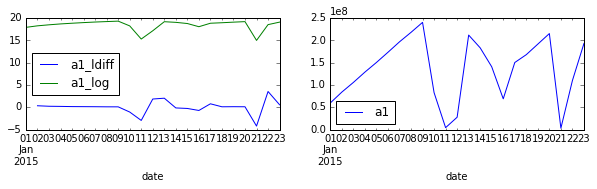

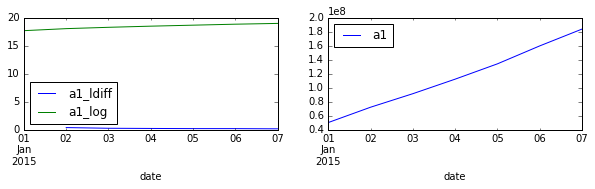

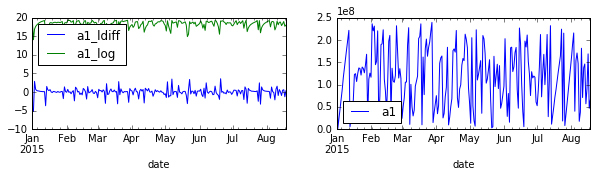

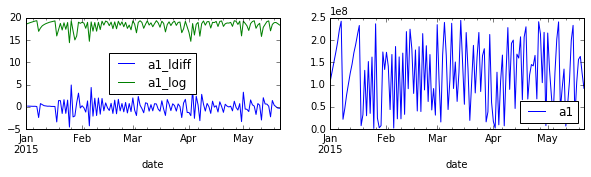

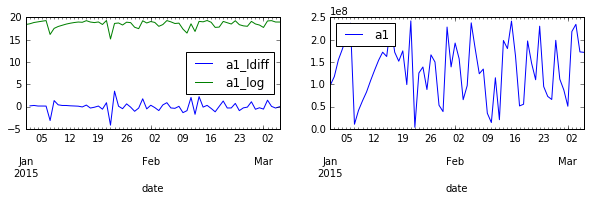

In [14]:
dd.plot_sample_history(dd.failed_devs["device"],10)

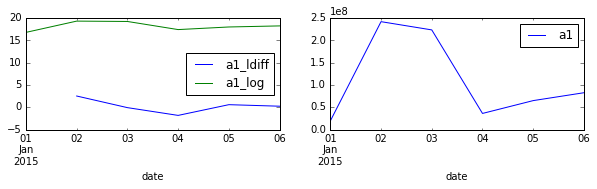

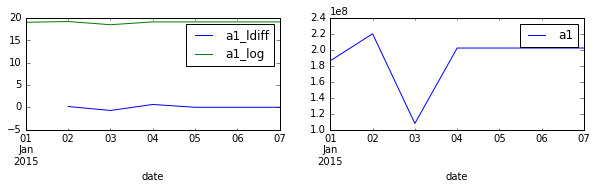

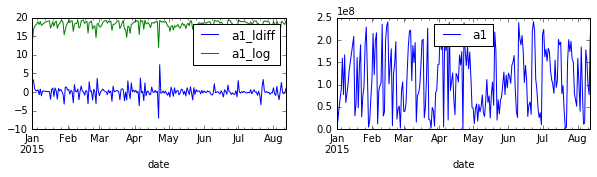

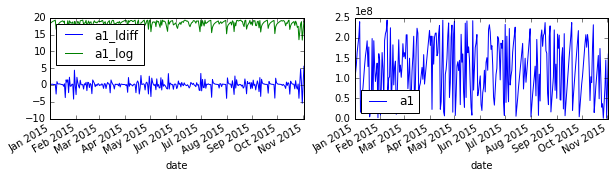

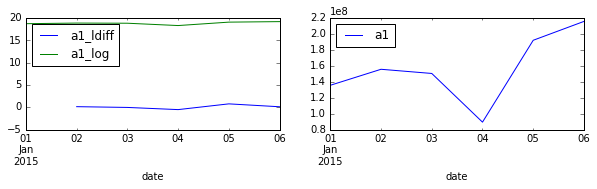

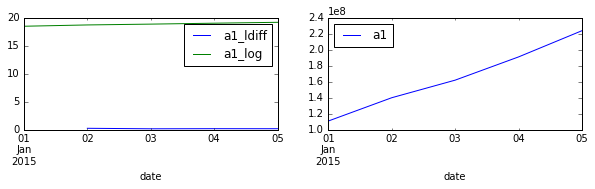

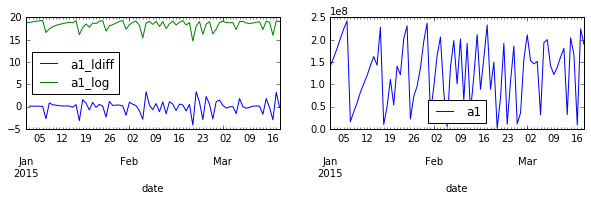

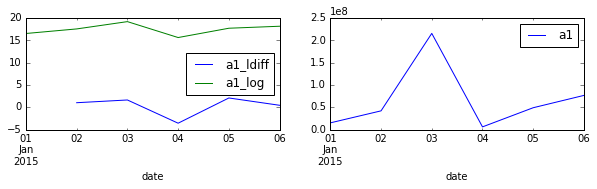

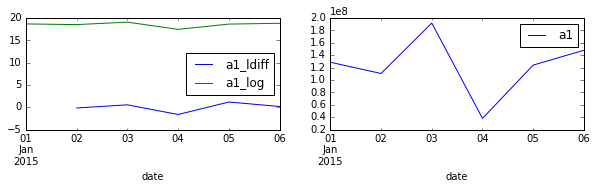

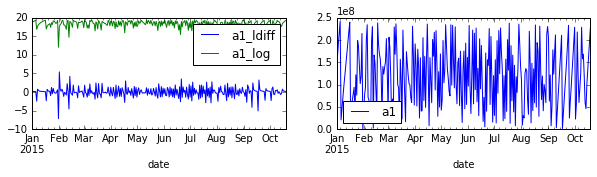

In [4]:
dd.plot_sample_history(dd.good_devs["device"],10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00227c8e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f001ea1a190>]], dtype=object)

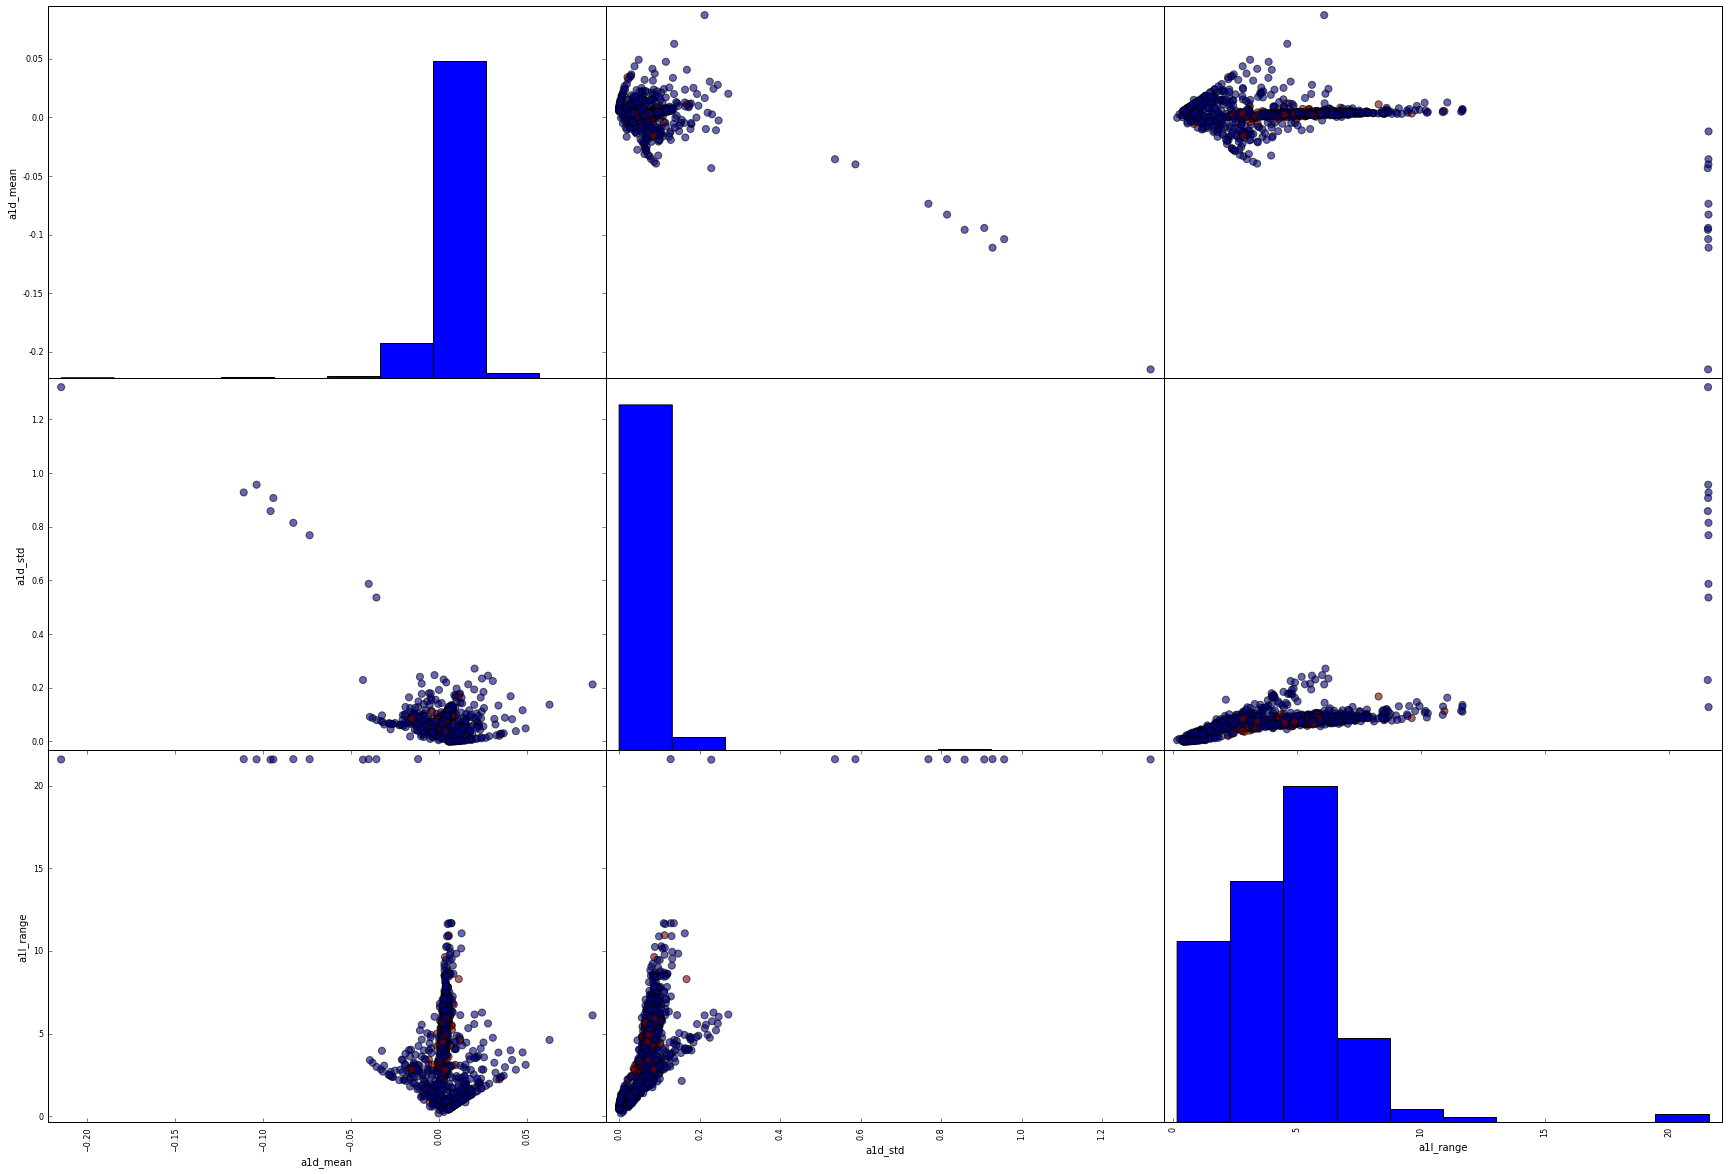

In [5]:
sfeature = dd.sfeature
fcols_tmp = [sfeature +"d_mean", sfeature +"d_std", sfeature +"l_range"]
df_sfeature = dd.df_sfeature
pd.scatter_matrix(df_sfeature[fcols_tmp], figsize=(30,20), s=200, c=df_sfeature["failure"], alpha=0.6)

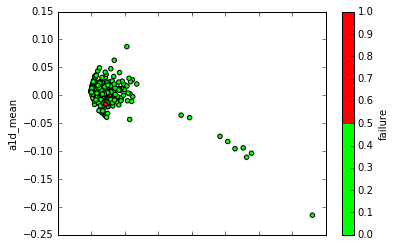

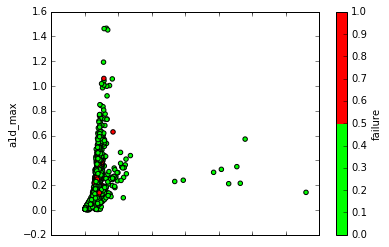

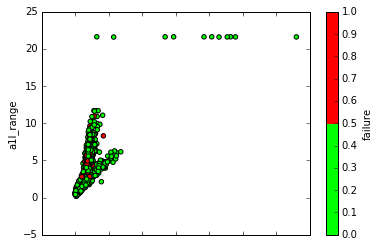

In [6]:
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"d_mean", c="failure", colormap=cmap_bold)
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"d_max", c="failure", colormap=cmap_bold)
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"l_range", c="failure", colormap=cmap_bold)

### As expected, just don't see anything useful here

In [7]:
algos_dd = {
    "LogisticRegression": {"C": 1e9},
    "LogisticRegressionB": {"C": 1e9, "class_weight":'balanced'},
    "KNeighborsClassifier": {"n_neighbors": 7},
    "LinearDiscriminantAnalysis": {},
    "QuadraticDiscriminantAnalysis": {}
}

fcols = ["d_mean:d_std:d_max:l_range",
         "d_mean:d_std:l_range",
         "d_std:l_range",
         "l_range",
         "d_std",
         "d_max"]
algos_str = ["LogisticRegression", 
             "LogisticRegressionB", 
             "KNeighborsClassifier",
             "LinearDiscriminantAnalysis",
             "QuadraticDiscriminantAnalysis"]

In [8]:
df_sfeature = dd.df_sfeature
sfeature = dd.sfeature
df_results = au.run_algo_analysis(df_sfeature, sfeature, fcols, algos_str, algos_dd)

/home/vagrant/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vagrant/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


----------
LogisticRegression:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.60
Cross-val-score(accuracy) = 0.91
Cross-val-score(recall)   = 0.00
Cross-val-score(precision)= 0.00
Cross-val-score(f1)       = 0.00
----------
LogisticRegressionB:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.64
Cross-val-score(accuracy) = 0.60
Cross-val-score(recall)   = 0.57
Cross-val-score(precision)= 0.13
Cross-val-score(f1)       = 0.13
----------
KNeighborsClassifier:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.59
Cross-val-score(accuracy) = 0.91
Cross-val-score(recall)   = 0.05
Cross-val-score(precision)= 0.45
Cross-val-score(f1)       = 0.45
----------
LinearDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.63
Cross-val-score(accuracy) = 0.91
Cross-val-score(recall)   = 0.00
Cross-val-score(precision)= 0.00
Cross-val-score(f1)       = 0.00
----------
QuadraticDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.61
Cross

In [10]:
df_results

,fcols,algo,recall,precision,f1,roc_auc,accuracy
4,d_mean:d_std:d_max:l_range,QuadraticDiscriminantAnalysis,0.65,0.12,0.20,0.61,0.52
1,d_mean:d_std:d_max:l_range,LogisticRegressionB,0.57,0.13,0.21,0.64,0.60
9,d_mean:d_std:l_range,QuadraticDiscriminantAnalysis,0.57,0.12,0.19,0.62,0.55
16,l_range,LogisticRegressionB,0.57,0.11,0.18,0.56,0.53
11,d_std:l_range,LogisticRegressionB,0.53,0.11,0.18,0.58,0.53
6,d_mean:d_std:l_range,LogisticRegressionB,0.51,0.10,0.17,0.57,0.53
21,d_std,LogisticRegressionB,0.50,0.08,0.14,0.49,0.49
26,d_max,LogisticRegressionB,0.46,0.08,0.14,0.48,0.49
2,d_mean:d_std:d_max:l_range,KNeighborsClassifier,0.05,0.45,0.09,0.59,0.91
12,d_std:l_range,KNeighborsClassifier,0.01,0.10,0.02,0.61,0.91


### Even though recall is high, precision, accuracy and roc_auc are too low
### This is not right approach.

## See if rolling averages and rolling standard deviations look different in good vs bad

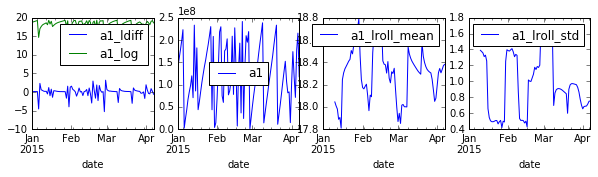

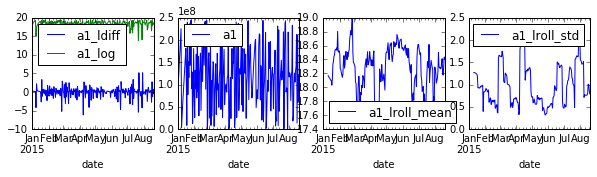

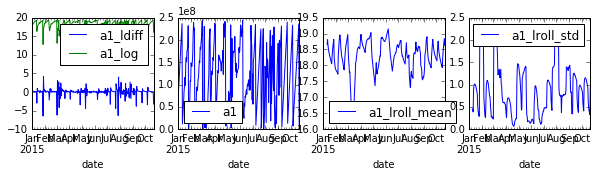

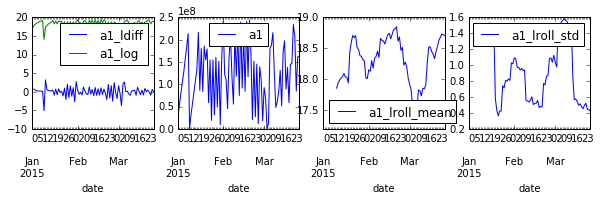

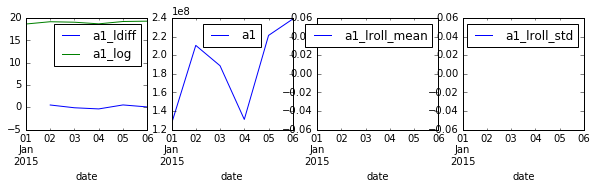

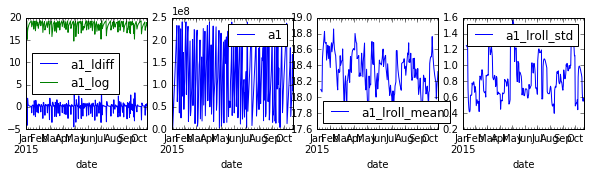

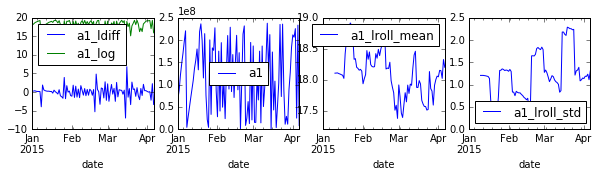

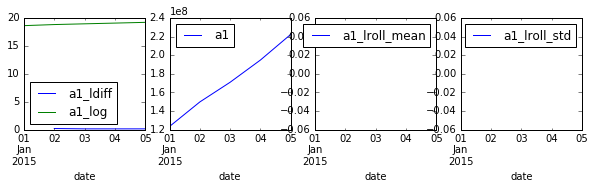

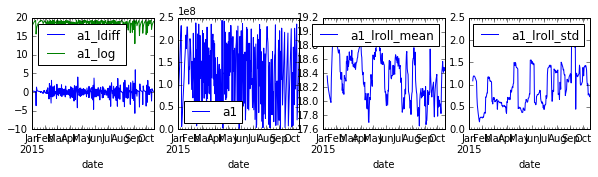

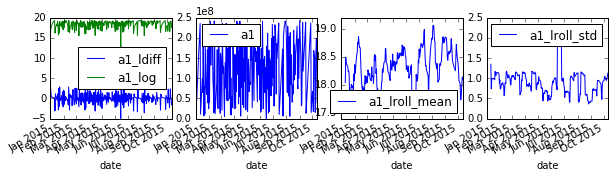

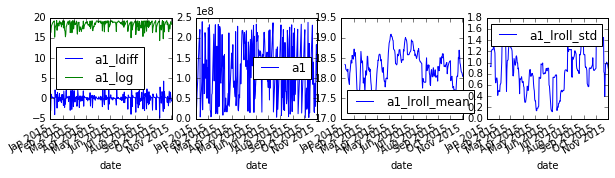

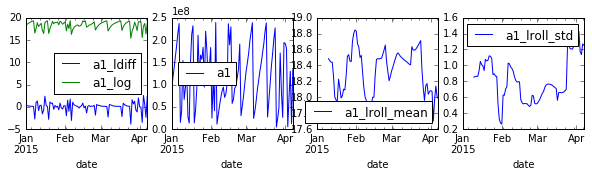

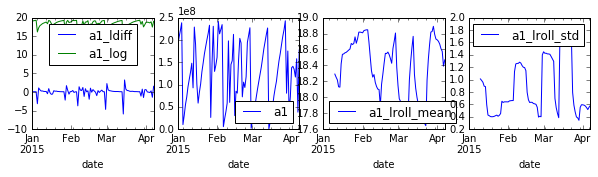

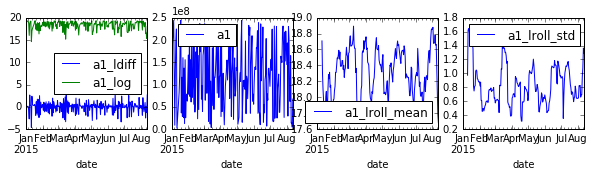

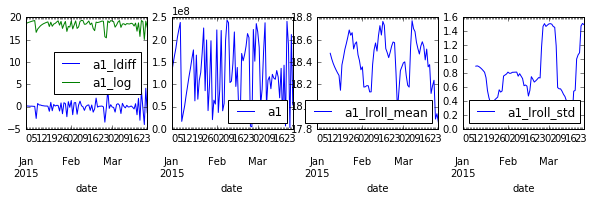

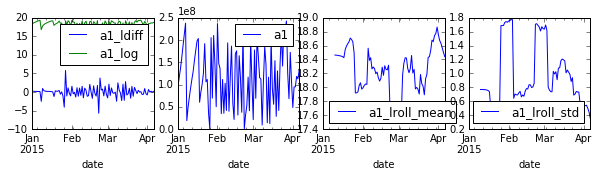

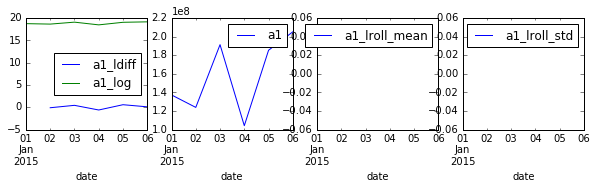

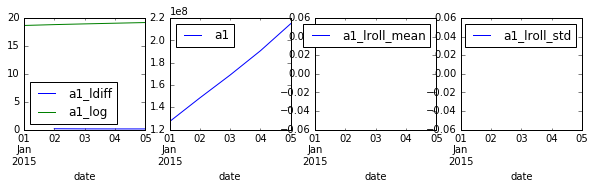

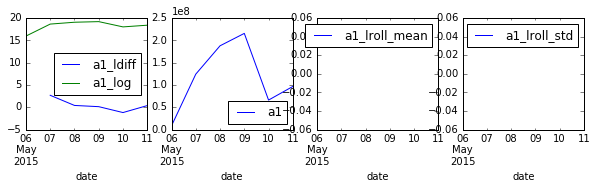

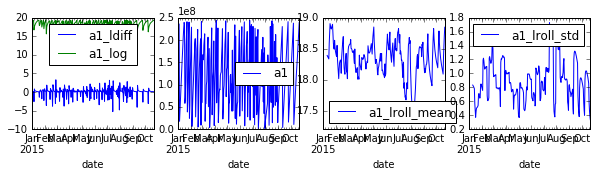

In [11]:
dd.plot_sample_history(dd.good_devs["device"], 20, plot_type="rolling")

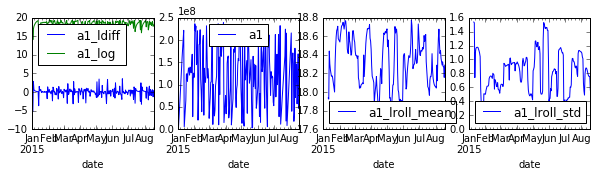

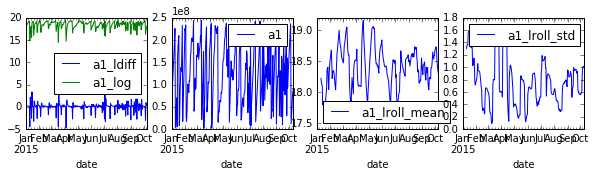

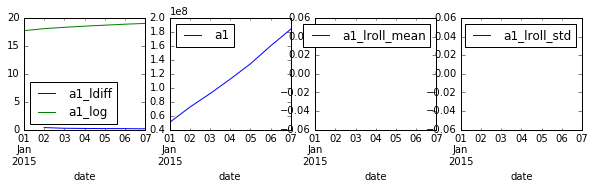

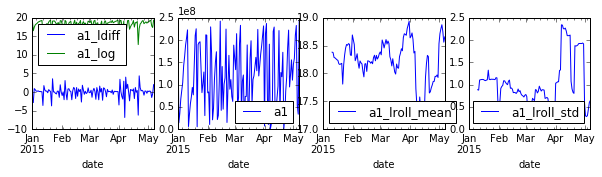

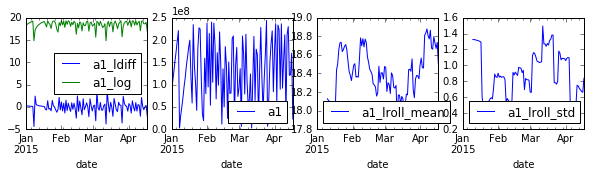

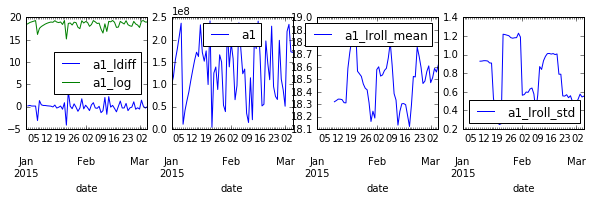

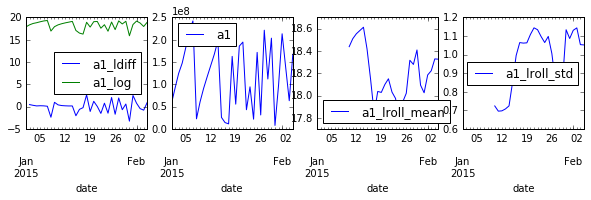

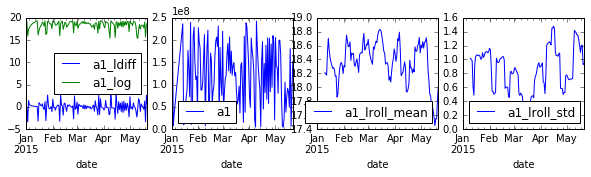

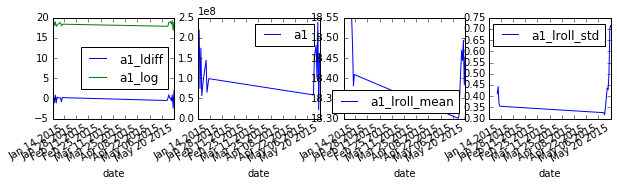

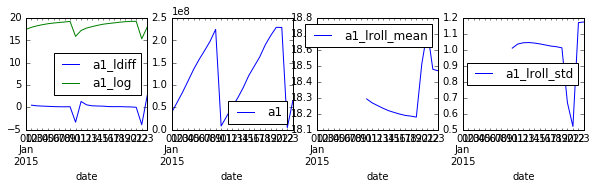

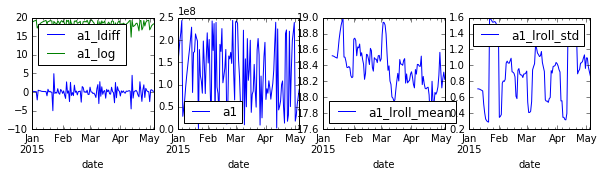

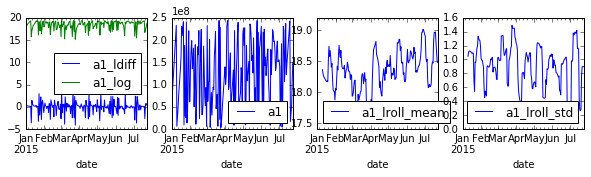

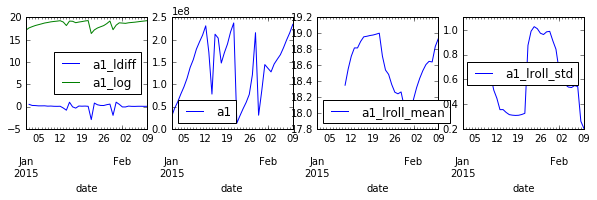

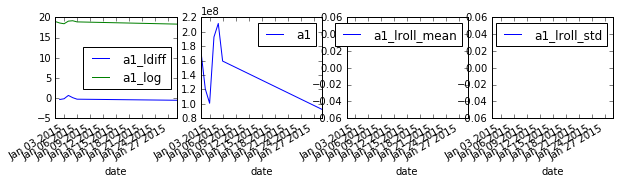

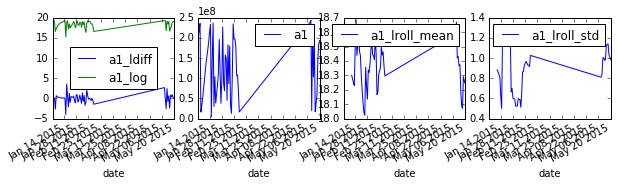

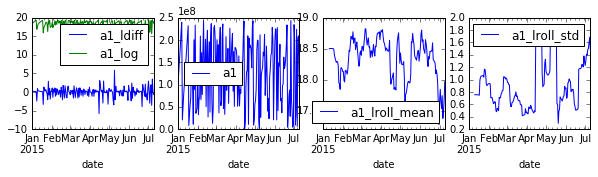

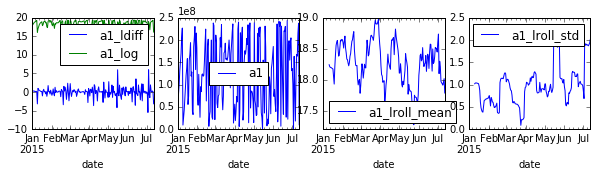

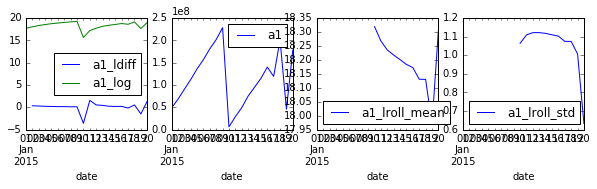

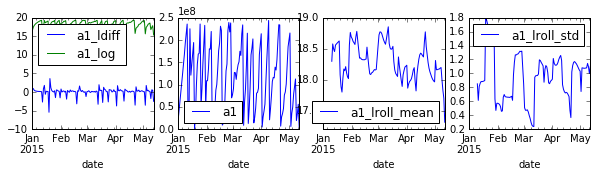

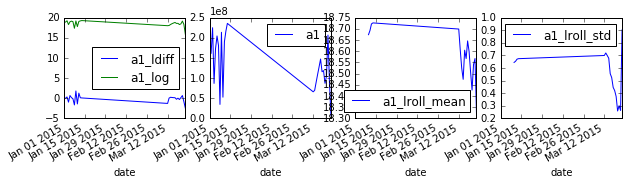

In [13]:
dd.plot_sample_history(dd.failed_devs["device"], 20, plot_type="roll")

### These features don't look promising either

### Try using bias and coeifficient of regression line of values as feature
### Purpose is to see if overall trend is going up or down
### Don't think it will work, but should give it a try

In [3]:
def get_lnr_coef_intercept(tdf, dev):
    ttdf = tdf[tdf["device"] == dev][["date","a1"]]
    ttdf["day"] = ttdf.date.map(lambda x: x.month*30 + x.day)
    y = np.log(ttdf["a1"] + 0.01)
    X = pd.DataFrame(ttdf["day"])
    reg = LinearRegression()
    reg.fit(X,y)
    return (reg.coef_[0], reg.intercept_)

In [4]:
def getlnrcoef_df(tdf, alldevs, feature):
    dd = dict()
    for dev in alldevs.index.values:
        dd[dev] = dict()
        coef, bias = get_lnr_coef_intercept(tdf, dev)
        dd[dev]["coef"] = coef
        dd[dev]["bias"] = bias
    return pd.DataFrame(dd).transpose().join(alldevs)

In [5]:
get_lnr_coef_intercept(dd.df, "S1F013BB")

(0.35233196919027882, -37.601320719261153)

In [6]:
ldf = getlnrcoef_df(dd.df, dd.all_devs, "a1")

In [7]:
ldf.head()

,bias,coef,failure
S1F01085,8.705682,0.276836,0
S1F013BB,-37.601321,0.352332,0
S1F0166B,27.670013,-0.286422,0
S1F01E6Y,18.578027,-0.001026,0
S1F01JE0,13.761807,0.152268,0


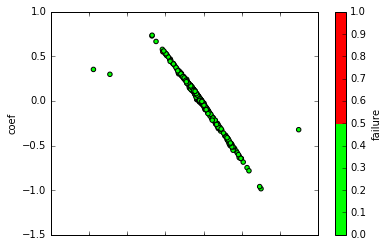

In [8]:
ldf.plot(kind='scatter', x='bias', y='coef', c="failure", colormap=cmap_bold)

### This looks just as useless

In [9]:
algos_dd = {
    "LogisticRegression": {"C": 1e9},
    "LogisticRegressionB": {"C": 1e9, "class_weight":'balanced'},
    "KNeighborsClassifier": {"n_neighbors": 7},
    "LinearDiscriminantAnalysis": {},
    "QuadraticDiscriminantAnalysis": {},
    "SVC": {}
}

fcols = ["d_mean:d_std:d_max:l_range",
         "d_mean:d_std:l_range",
         "d_std:l_range",
         "l_range",
         "d_std",
         "d_max"]
algos_str = ["LogisticRegression", 
             "LogisticRegressionB", 
             "KNeighborsClassifier",
             "LinearDiscriminantAnalysis",
             "QuadraticDiscriminantAnalysis"]

In [11]:
algo_str = "QuadraticDiscriminantAnalysis"
scols = ["bias", "coef"]
analysisdf = au.do_clf_validate_new(ldf, algo_str,algos_dd[algo_str], scols, "failure")

Cross-val-score(roc_auc) = 0.60
Cross-val-score(accuracy) = 0.44
Cross-val-score(recall)   = 0.78
Cross-val-score(precision)= 0.11
Cross-val-score(f1)       = 0.11


### a1 Summary:
#### Precision and Accuracy are too low to take these derived features seriously
####  Need to do further investigation and take some advise from any Senior Signal Processing Scientist if necessary
#### Considering data quality issues, not sure if it is good idea to even try frequency component analysis. For frequency analysis to make sense, we at least need all devices data every day for last 64/128/256 days very consistently.